In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Helper Functions

In [3]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [5]:

def  load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

# Load Data

In [7]:
img_dir = os.path.join(os.getcwd(), "./images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [8]:
X = pd.DataFrame([im.histogram() for im in images])

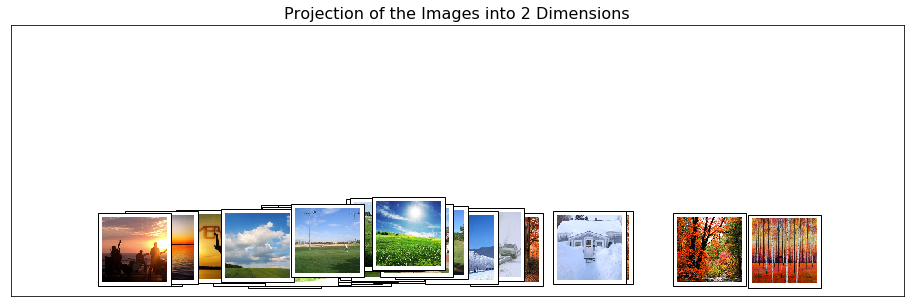

In [9]:
plot_image_space(images, X, title="Projection of the Images into 2 Dimensions")

# Assignment Tasks

## Part1 [25pts]:
<b>The PCA projection of the image color histograms in 2 dimensions. Using the provided
plot image space() function. This should be displayed as thumbnail images distributed
within a 2-dimensional plot.
You will need to use PCA, which is implemented in scikit-learn. See this link for documentation
here (http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

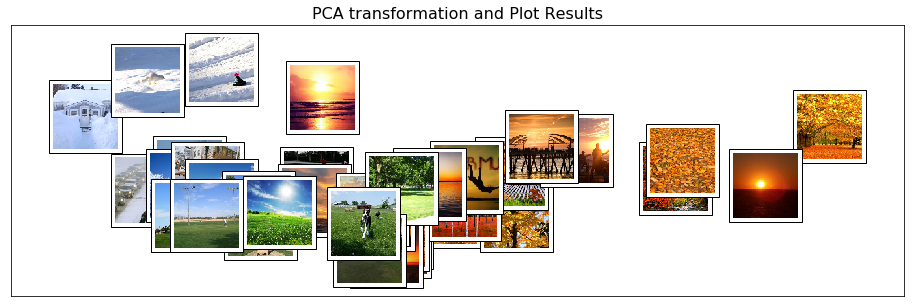

In [10]:
from sklearn import decomposition
# Generate PCA tranformation and plot results
estimator = decomposition.PCA(n_components=2)
X_proj = estimator.fit_transform(X)
plot_image_space(images, X_proj, 'PCA transformation and Plot Results')

## Part2 [25pts]:
<b>Given this output, What does it mean for two images to be close together in this plot?<br>
What does it mean for two images to be far apart?

The images closer to each other have similar color scheme hence, similar pixel alignment. So, images of same season are lokely to be closer to each other.<br> 
On the other hand, images which are fall apart has very different color scheme or pixel alignment. So, they are likely to represent different seasons.

## Part3 [50pts]:
<b>Once you completed the first two parts of the assignment, choose one of the following
below:
1. Repeat this process while using a different set of images curated by yourself.
2. Repeat this process using a different data reduction method and describe any similarities/differences
between that experiment when compared to applying PCA.

For this part of the assignment, I have used images I've clicked so far in Boston. There are 125 images in total in this dataset taken at different times of the day.
The images can be found on : https://drive.google.com/open?id=12IyaOVdYblS1iXKivyb6W7c9UmJrPkXR

In order to run this code, download this dataset and extract it in the same folder as the assignment notebook.

In [11]:
img_dir2 = os.path.join(os.getcwd(), "./Boston_images") # directory path
images2 = load_images(img_dir2) # load images in the specified directory

In [12]:
Y = pd.DataFrame([im.histogram() for im in images2])

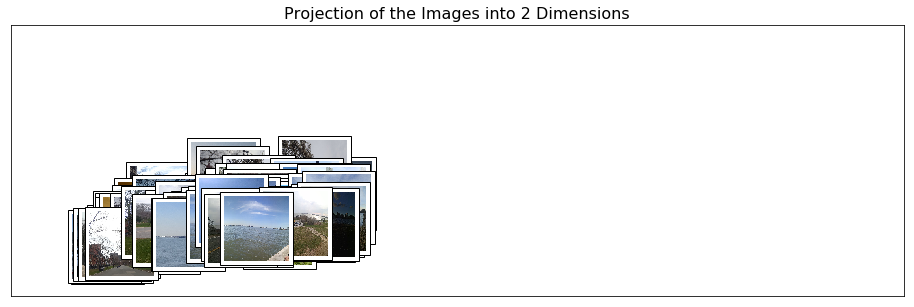

In [13]:
plot_image_space(images2, Y, title="Projection of the Images into 2 Dimensions")

On plotting them, we observed that almost all the images overlapped each other and we couldn't get any proper division here.

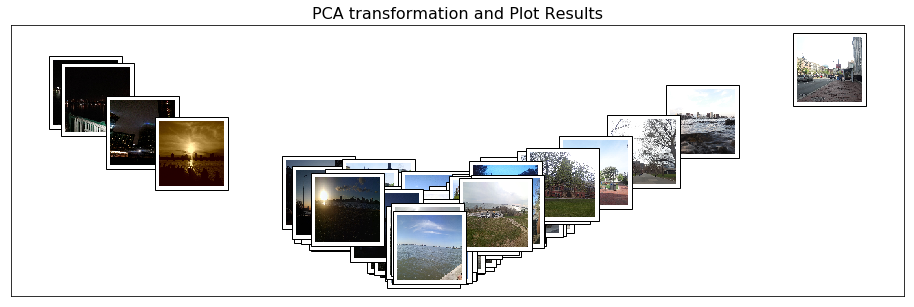

In [14]:
from sklearn import decomposition
# Generate PCA tranformation and plot results
estimator = decomposition.PCA(n_components=5)
Y_proj = estimator.fit_transform(Y)
plot_image_space(images2, Y_proj, 'PCA transformation and Plot Results')

On performing PCA on this dataset, we found that the darker images tend to gather on the left side of the space while the lighter ones on the right. The ones where the clear blue sky is prominent gathered in the middle.

In [15]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')

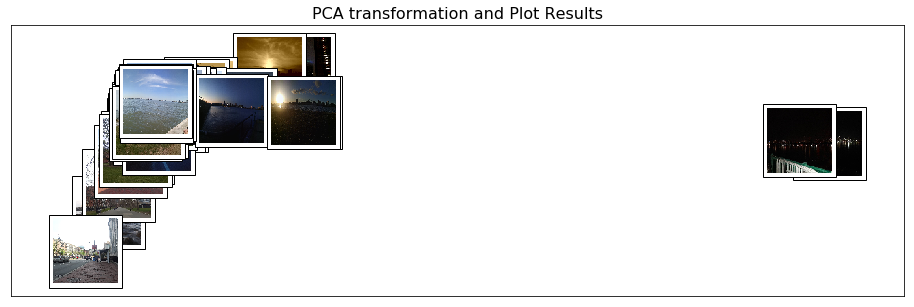

In [16]:
Y_proj_lle = model.fit_transform(Y)
plot_image_space(images2, Y_proj_lle, 'LLE transformation and Plot Results')

On performing Locally linear embedding analysis on my own dataset, I got the above plot. 

In [22]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='modified',
                               eigen_solver='dense')

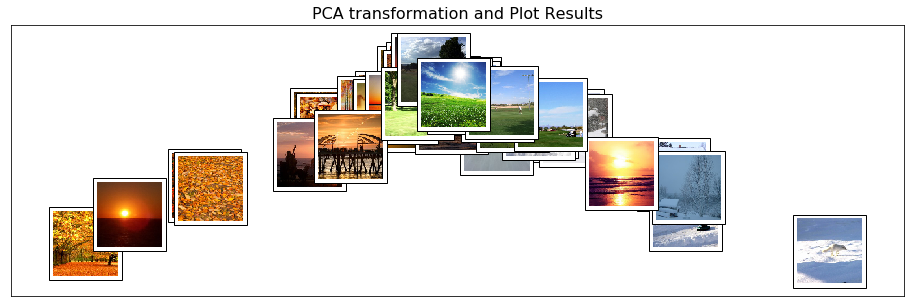

In [23]:
X_proj = model.fit_transform(X)
plot_image_space(images, X_proj, 'PCA transformation and Plot Results')

And this is the result of LLE analysis on given dataset.